# Hinweis zu den Aufgaben

Die mit F bezeichneten Aufgaben sind fortgeschrittene Aufgaben. Die Bearbeitung ist freiwillig.

## Folgende Dateien werden benötigt

- smallSampleFile.edf

## Folgende libraries müssen installiert werden
Eine JupyterHub-Konsole finden Sie unter New Launcher -> Console -> Bash. Nach der Installation muss das Notebook evtl. neu geöffnet werden (inkl. Kernel restart).

- edfrd
> pip3 install --user edfrd

In [1]:
# Import required libs
import os #allows for access to environment variables, is part of core 
import math
import matplotlib as mpl
import matplotlib.pyplot as plt # plotting
import numpy as np # numerical arrays
import scipy as sp # scientific computing
import scipy.signal as sgn
import scipy.optimize as opt
import edfrd

from collections import namedtuple
from edfrd import read_header, read_data_records, write_header, write_data_records

# get versions
print(
    'Versions: mpl: ' + mpl.__version__ + 
    ', np: ' + np.__version__ + ', sp: ' + sp.__version__)

Versions: mpl: 3.3.3, np: 1.18.5, sp: 1.5.3


# Biosignal-Standard EDF

Das European Data Format (EDF) beschreibt Biosignale mit Metadaten und optionalen Annotationen. Wir beschäftigen uns mit einer EDF-Datei, die eine Polysomnographie enthält.

**Q1:** Lesen Sie die Daten aus der vorgegebenen EDF-Datei. Welche Signale sind darin vorhanden?

In [ ]:
# define data source
data_dir = "./input-data"
# define filename
file_name = 'smallSampleFile.edf'

# read header
header = pass
# print signal labels
pass

In [2]:
### musterloesung

# define data source
data_dir = "./input-data"
# define filename
file_name = 'smallSampleFile.edf'

# read header
header = read_header(os.path.join(data_dir,file_name))
#print signal labels
for x in header.signals:
    print(x.label)

EEG F3-A2
EEG F4-A1
EEG C3-A2
EEG C4-A1
EEG O1-A2
EEG O2-A1
EOG Left
EOG Right
EMG Chin
ECG I
RR
Flow Patient
Effort Tho
Effort Abd
Snore
SpO2
xPAP CPAP
Leak Total
Leg BeinLi
Leg BeinRe
Body
EEG A1-A2
Imp


**Q2:** Berechnen Sie die Samplingrate des EKG-Signals.

In [ ]:
# define signal to be read in
signal_index = pass
signal_header = pass

sampling_frequency = pass

print(sampling_frequency)

In [3]:
### musterloesung

# define signal to be read in
signal_index = 9
signal_header = header.signals[signal_index]

sampling_frequency = signal_header.nr_of_samples_in_each_data_record/header.duration_of_a_data_record

print(sampling_frequency)

200.0


**Q2F:** Berechnen Sie die Samplingrate der Atmung (Flow_Patient). Unterscheidet sich diese vom EKG? Was wäre ein Grund dafür?

In [4]:
### musterloesung

# define second signal to be read in
signal_index2 = 11
signal_header2 = header.signals[signal_index2]

sampling_frequency2 = signal_header2.nr_of_samples_in_each_data_record/header.duration_of_a_data_record

print(sampling_frequency2)

10.0


**A2F:** Die Samplingrate der Atmung... Das liegt an...

### musterloesung

**A2F:** Die Samplingrate der Atmung ist deutlich geringer als die des EKGs. Das liegt daran, dass hier weniger Details erkannt werden müssen - während im EKG innerhalb kurzer Zeit verschiedene Wellen und Spitzen auftauchen können, wird in der gleichen Zeit vielleicht nur eingeatmet. Das lässt sich problemlos mit weniger Samples beschreiben.

**Q3:** Plotten Sie die letzten 20 Sekunden des EKG-Signals.
<!-- Hinweis: Ein Array kann auch von hinten ausgelesen werden. -->

In [ ]:
# define buffer length (signal) in terms of data records
start, end = 0,header.number_of_data_records
buffer_length = (end - start) * signal_header.nr_of_samples_in_each_data_record
signal = np.empty(buffer_length, dtype=np.int16)
pointer = 0
# read signal in buffer
for data_record in read_data_records(os.path.join(data_dir,file_name),header,start, end):
    signal[pointer:pointer+signal_header.nr_of_samples_in_each_data_record] = data_record[signal_index]
    pointer += signal_header.nr_of_samples_in_each_data_record
    
# get signal label
signal_label = pass
# replace blanks
signal_label = signal_label.replace(" ", "-")
physical_dim = pass
# label for y-axis
plot_label = signal_label + ' [' + physical_dim + ']'

# create array for time
timesteps = pass
#scaling
digital_diff = signal_header.digital_maximum-signal_header.digital_minimum
physical_diff = signal_header.physical_maximum-signal_header.physical_minimum
signal = (signal-signal_header.digital_minimum)/(digital_diff)*(physical_diff)+signal_header.physical_minimum
plt.rcParams["figure.figsize"] = (16,6)

# Signal visualisation
# Plotting commands
window = sampling_frequency * 20 #s
plt.plot(pass,pass)
# xlabel 
plt.xlabel('t [s]')
# ylabel 
plt.ylabel(plot_label)
# show the plot
plt.show()

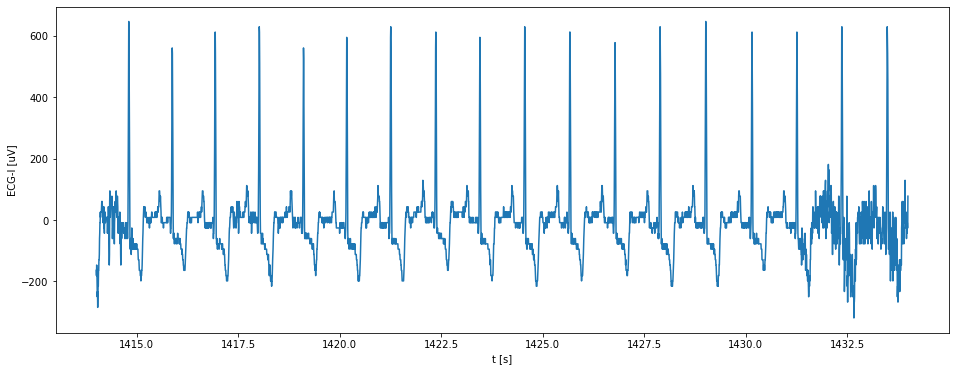

In [5]:
### musterloesung

# define buffer length (signal) in terms of data records
start, end = 0,header.number_of_data_records
buffer_length = (end - start) * signal_header.nr_of_samples_in_each_data_record
signal = np.empty(buffer_length, dtype=np.int16)
pointer = 0
# read signal in buffer
for data_record in read_data_records(os.path.join(data_dir,file_name),header,start, end):
    signal[pointer:pointer+signal_header.nr_of_samples_in_each_data_record] = data_record[signal_index]
    pointer += signal_header.nr_of_samples_in_each_data_record
    
# get signal label
signal_label = signal_header.label
# replace blanks
signal_label = signal_label.replace(" ", "-")
physical_dim = signal_header.physical_dimension
# label for y-axis
plot_label = signal_label + ' [' + physical_dim + ']'

# create array for time
timesteps = np.arange(signal.size)/sampling_frequency
#scaling
digital_diff = signal_header.digital_maximum-signal_header.digital_minimum
physical_diff = signal_header.physical_maximum-signal_header.physical_minimum
signal = (signal-signal_header.digital_minimum)/(digital_diff)*(physical_diff)+signal_header.physical_minimum
plt.rcParams["figure.figsize"] = (16,6)

# Signal visualisation
# Plotting commands
window = sampling_frequency * 20 #s
plt.plot(timesteps[-int(window):],signal[-int(window):])
# xlabel 
plt.xlabel('t [s]')
# ylabel 
plt.ylabel(plot_label)
# show the plot
plt.show()

**Q4:** Schreiben Sie den Header für die letzten 20 Sekunden des EKG-Signals in eine neue EDF-Datei. Überprüfen Sie das Ergebnis durch erneutes Auslesen des Headers.
<!-- Hinweis zu signals: Lassen Sie sich mit help(x) den Datentyp ausgeben. -->

In [ ]:
# define target file
out_dir = "./output-data"
new_file_name = 'NEW_FILE.edf'

# adapt header
new_size = pass # number_of_data_records
new_number_of_signals = pass
new_signal_header = []
new_signal_header.append(signal_header)
new_header = header._replace(number_of_bytes_in_header_record=new_number_of_signals*256+256,pass,pass,pass)
        
# write edf file
pass

# read new header
pass
print(header)

In [6]:
### musterloesung

# define target file
out_dir = "./output-data"
new_file_name = 'NEW_FILE.edf'

# adapt header
new_size = window / signal_header.nr_of_samples_in_each_data_record
new_number_of_signals = 1
new_signal_header = []
new_signal_header.append(signal_header)
new_header = header._replace(number_of_bytes_in_header_record=new_number_of_signals*256+256,number_of_signals=1,number_of_data_records=int(new_size),signals=tuple(new_signal_header,))
        
# write edf file
write_header(os.path.join(out_dir,new_file_name), new_header)

# read new header
header = read_header(os.path.join(out_dir,new_file_name))
print(header)

Header(version='0', local_patient_identification='patient23', local_recording_identification='StartDate 24-MAY-2013 X X Alice_5 A5BS01492 456200', startdate_of_recording='24.05.13', starttime_of_recording='10.58.56', number_of_bytes_in_header_record=512, reserved=None, number_of_data_records=20, duration_of_a_data_record=1, number_of_signals=1, signals=(SignalHeader(label='ECG I', transducer_type='', physical_dimension='uV', physical_minimum=-2200.0, physical_maximum=2200.0, digital_minimum=0, digital_maximum=255, prefiltering='', nr_of_samples_in_each_data_record=200, reserved=None),))
